# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import requests 
import openweathermapy.core as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
settings = {'units': 'imperial', 'APPID': weather_api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']
#set list
lat = []
lng = []
humidity = []
max_temp = []
wind_speeds = []
cloudiness = []
country = []
dates = []
city_1 = []

count_1 = 0
set_1 = 1


# begin data retriveval

print('''Beginning Data Retrieval
      -------------------------''')
counter = 1
# use iterrows to iterate through pandas dataframe
for city in cities:
    query_url = base_url + '&q' + city.replace(' ','+')
    print(f"Processing the city {counter} | {city}")
    try:
    
        api_data = owm.get_current(city,**settings)
        cl,ct,dt,hm,mt,ws,lt,ln = api_data(*desired_keys)
        
        cloudiness.append(cl)
        country.append(ct)
        dates.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speeds.append(ws)
        lat.append(lt)
        lng.append(ln)
        city_1.append(city)

        
        
    except :
        print("Missing field/result... skipping.")
    counter += 1
        
print("------------")

Beginning Data Retrieval
      -------------------------
Processing the city 1 | smithers
Processing the city 2 | mocajuba
Processing the city 3 | tarakan
Processing the city 4 | bluff
Processing the city 5 | jacareacanga
Processing the city 6 | nizhneyansk
Missing field/result... skipping.
Processing the city 7 | arraial do cabo
Processing the city 8 | salalah
Processing the city 9 | port alfred
Processing the city 10 | new norfolk
Processing the city 11 | fort nelson
Processing the city 12 | muravlenko
Processing the city 13 | stokmarknes
Processing the city 14 | bairiki
Processing the city 15 | mwene-ditu
Processing the city 16 | fort-shevchenko
Processing the city 17 | burhanpur
Processing the city 18 | hermanus
Processing the city 19 | mataura
Processing the city 20 | bredasdorp
Processing the city 21 | lebu
Processing the city 22 | geraldton
Processing the city 23 | hay river
Processing the city 24 | uige
Processing the city 25 | bilma
Processing the city 26 | the valley
Processi

Processing the city 222 | mama
Processing the city 223 | teya
Processing the city 224 | ponta do sol
Processing the city 225 | victoria
Processing the city 226 | souillac
Processing the city 227 | barentsburg
Missing field/result... skipping.
Processing the city 228 | laguna
Processing the city 229 | hunza
Missing field/result... skipping.
Processing the city 230 | tessalit
Processing the city 231 | tuggurt
Missing field/result... skipping.
Processing the city 232 | meulaboh
Processing the city 233 | nha trang
Processing the city 234 | longonjo
Processing the city 235 | mount gambier
Processing the city 236 | huittinen
Processing the city 237 | rawah
Processing the city 238 | jalingo
Processing the city 239 | klaksvik
Processing the city 240 | petropavlovsk-kamchatskiy
Processing the city 241 | tual
Processing the city 242 | narsaq
Processing the city 243 | upernavik
Processing the city 244 | palmer
Processing the city 245 | aden
Processing the city 246 | constitucion
Processing the ci

Processing the city 432 | san cristobal
Processing the city 433 | isla mujeres
Processing the city 434 | barcelona
Processing the city 435 | qingdao
Processing the city 436 | omboue
Processing the city 437 | gadwal
Processing the city 438 | sogdiondon
Missing field/result... skipping.
Processing the city 439 | calabozo
Processing the city 440 | bolitoc
Processing the city 441 | velyka mykhaylivka
Processing the city 442 | saleaula
Missing field/result... skipping.
Processing the city 443 | pakxan
Processing the city 444 | mogadishu
Processing the city 445 | akureyri
Processing the city 446 | chirongui
Processing the city 447 | tacoronte
Processing the city 448 | valparaiso
Processing the city 449 | ovsyanka
Processing the city 450 | bom jesus
Processing the city 451 | andapa
Processing the city 452 | khalkhal
Processing the city 453 | weinan
Processing the city 454 | manicore
Processing the city 455 | haapiti
Processing the city 456 | burgeo
Processing the city 457 | recarei
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dic = {"City": city_1, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speeds, "Date": dates}

cities_data = pd.DataFrame(cities_dic)
cities_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,smithers,54.78,-127.17,26.60,86,20,6.93,1608585059
1,mocajuba,-2.58,-49.51,83.71,67,84,2.93,1608585145
2,tarakan,3.30,117.63,78.44,86,100,6.76,1608585146
3,bluff,-46.60,168.33,62.01,93,97,1.01,1608585146
4,jacareacanga,-6.22,-57.75,83.79,80,100,1.70,1608585146


In [5]:
cities_data.to_csv("cities_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

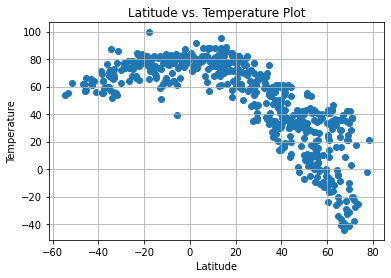

<Figure size 432x288 with 0 Axes>

In [8]:


# Plot scatter plot
plt.scatter(cities_data['Lat'],cities_data['Max Temp'])

# Plot regression line



# Label plot
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()

# Print r square value


# Show plot
plt.show()
plt.savefig("latvstemp")

## Latitude vs. Humidity Plot

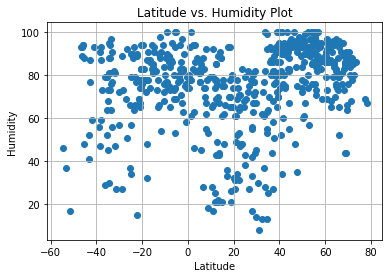

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(cities_data['Lat'],cities_data['Humidity'])


# Label plot
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()


# Show plot
plt.show()
plt.savefig("latvshumd")

## Latitude vs. Cloudiness Plot

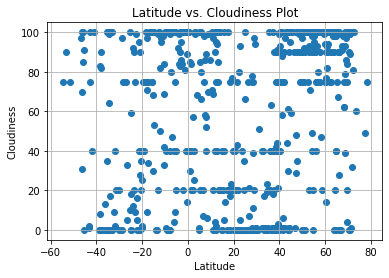

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cities_data['Lat'],cities_data['Cloudiness'])


# Label plot
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()


# Show plot
plt.show()
plt.savefig("latvscloud")
plt.savefig("image2")

## Latitude vs. Wind Speed Plot

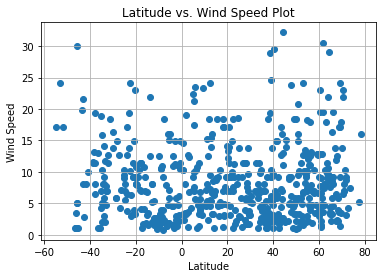

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cities_data['Lat'],cities_data['Wind Speed'])


# Label plot
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()


# Show plot
plt.show()
plt.savefig("latvscloud")
plt.savefig("image3")

## Linear Regression


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7037781803140944


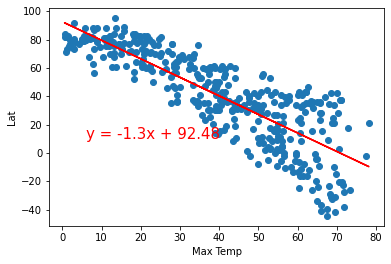

<Figure size 432x288 with 0 Axes>

In [15]:


north_df = cities_data[cities_data['Lat']>=0]
northern_lat = north_df['Lat']
temperature = north_df['Max Temp']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,temperature)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(northern_lat,temperature)

# Plot regression line
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Lat')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image4")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.2964655628322803


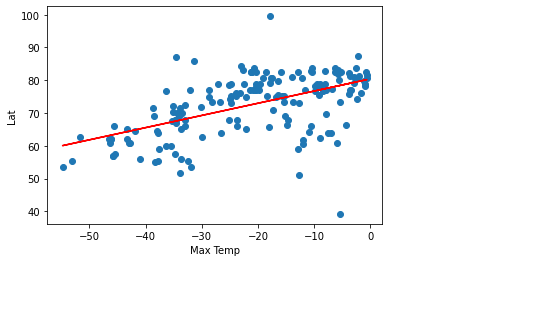

In [16]:
south_df = cities_data[cities_data['Lat']<0]
southern_lat = south_df['Lat']
temperature = south_df['Max Temp']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,temperature)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(southern_lat,temperature)

# Plot regression line
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Lat')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.14690797145350876


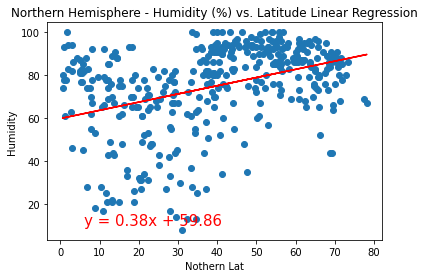

<Figure size 432x288 with 0 Axes>

In [17]:
north_df = cities_data[cities_data['Lat']>=0]
northern_lat = north_df['Lat']
humidity_df = north_df['Humidity']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,humidity_df)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(northern_lat,humidity_df)

# Plot regression line
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Nothern Lat')
plt.ylabel('Humidity')
plt.title ('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image5")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.06145337405947085


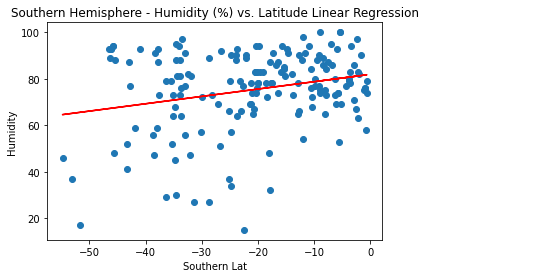

<Figure size 432x288 with 0 Axes>

In [18]:

southern_lat = south_df['Lat']
humidity_df = south_df['Humidity']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,humidity_df)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(southern_lat,humidity_df)

# Plot regression line
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Lat')
plt.ylabel('Humidity')
plt.title ('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image6")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.09718723340182919


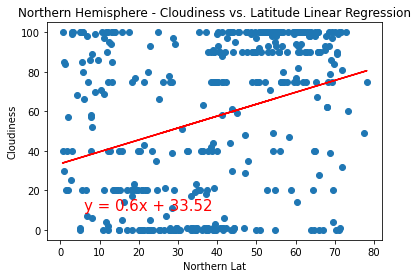

<Figure size 432x288 with 0 Axes>

In [19]:
northern_lat = north_df['Lat']
cloudy_df = north_df['Cloudiness']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,cloudy_df)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(northern_lat,cloudy_df)

# Plot regression line
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Lat')
plt.ylabel('Cloudiness')
plt.title ('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image7")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03995565333941087


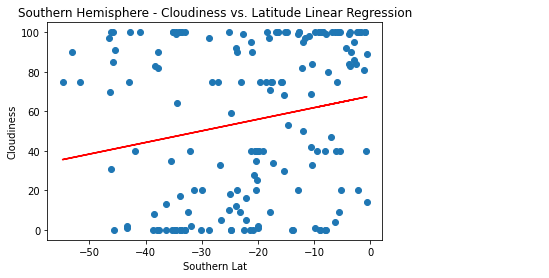

<Figure size 432x288 with 0 Axes>

In [20]:
southern_lat = south_df['Lat']
cloudy_df = south_df['Cloudiness']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,cloudy_df)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(southern_lat,cloudy_df)

# Plot regression line
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Lat')
plt.ylabel('Cloudiness')
plt.title ('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image7")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.003220087520327919


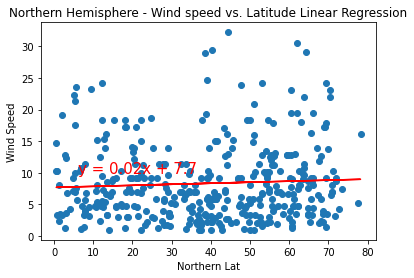

<Figure size 432x288 with 0 Axes>

In [21]:
northern_lat = north_df['Lat']
windy_df = north_df['Wind Speed']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat,windy_df)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(northern_lat,windy_df)

# Plot regression line
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Northern Lat')
plt.ylabel('Wind Speed')
plt.title ('Northern Hemisphere - Wind speed vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image8")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.06396370520876411


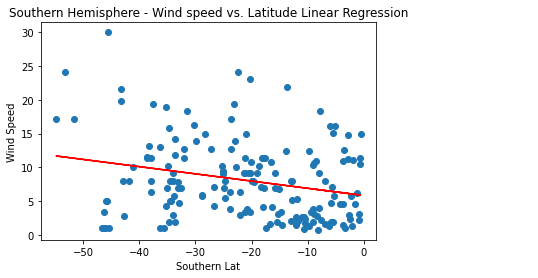

<Figure size 432x288 with 0 Axes>

In [22]:
southern_lat = south_df['Lat']
windy_df = south_df['Wind Speed']
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat,windy_df)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(southern_lat,windy_df)

# Plot regression line
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Southern Lat')
plt.ylabel('Wind Speed')
plt.title ('Southern Hemisphere - Wind speed vs. Latitude Linear Regression')


# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()
plt.savefig("image9")